In [142]:
#Handles warnings
import warnings
warnings.filterwarnings("ignore")

In [143]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Reading and Understanding the Data

In [144]:
#importing csv file
day_df=pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [145]:
day_df.shape

(730, 16)

In [146]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [147]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [148]:
day_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [149]:
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [150]:
day_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [151]:
#The data presented indicates that the instant column is an index column, so we may delete it.
#Since the dteday column contains the same information as the year month, we can eliminate it.
#Since we already know that casual+registered=cnt and cnt is our objective variable, we won't be considering casual and registered.

drop=['instant', 'dteday','casual', 'registered']
day_df.drop(drop , axis=1, inplace=True)
day_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [152]:
day_df.shape

(730, 12)

# Step 2: Visualising the Data

In [153]:
day_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [154]:
day_df['season'] = day_df['season'].map({1: "spring", 2: "summer", 3: "fall", 4: "winter"})

In [155]:
day_df['weathersit'] = day_df['weathersit'].map({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'})

In [156]:
day_df['weekday'] = day_df['weekday'].map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"})


In [157]:
day_df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Monday,1,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Tuesday,1,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Wednesday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Thursday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Friday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,12,0,Friday,1,Mist_cloudy,10.420847,11.33210,65.2917,23.458911,2114
726,spring,1,12,0,Saturday,0,Mist_cloudy,10.386653,12.75230,59.0000,10.416557,3095
727,spring,1,12,0,Sunday,0,Mist_cloudy,10.386653,12.12000,75.2917,8.333661,1341
728,spring,1,12,0,Monday,1,Clear_Few Clouds,10.489153,11.58500,48.3333,23.500518,1796


<Figure size 2000x1200 with 0 Axes>

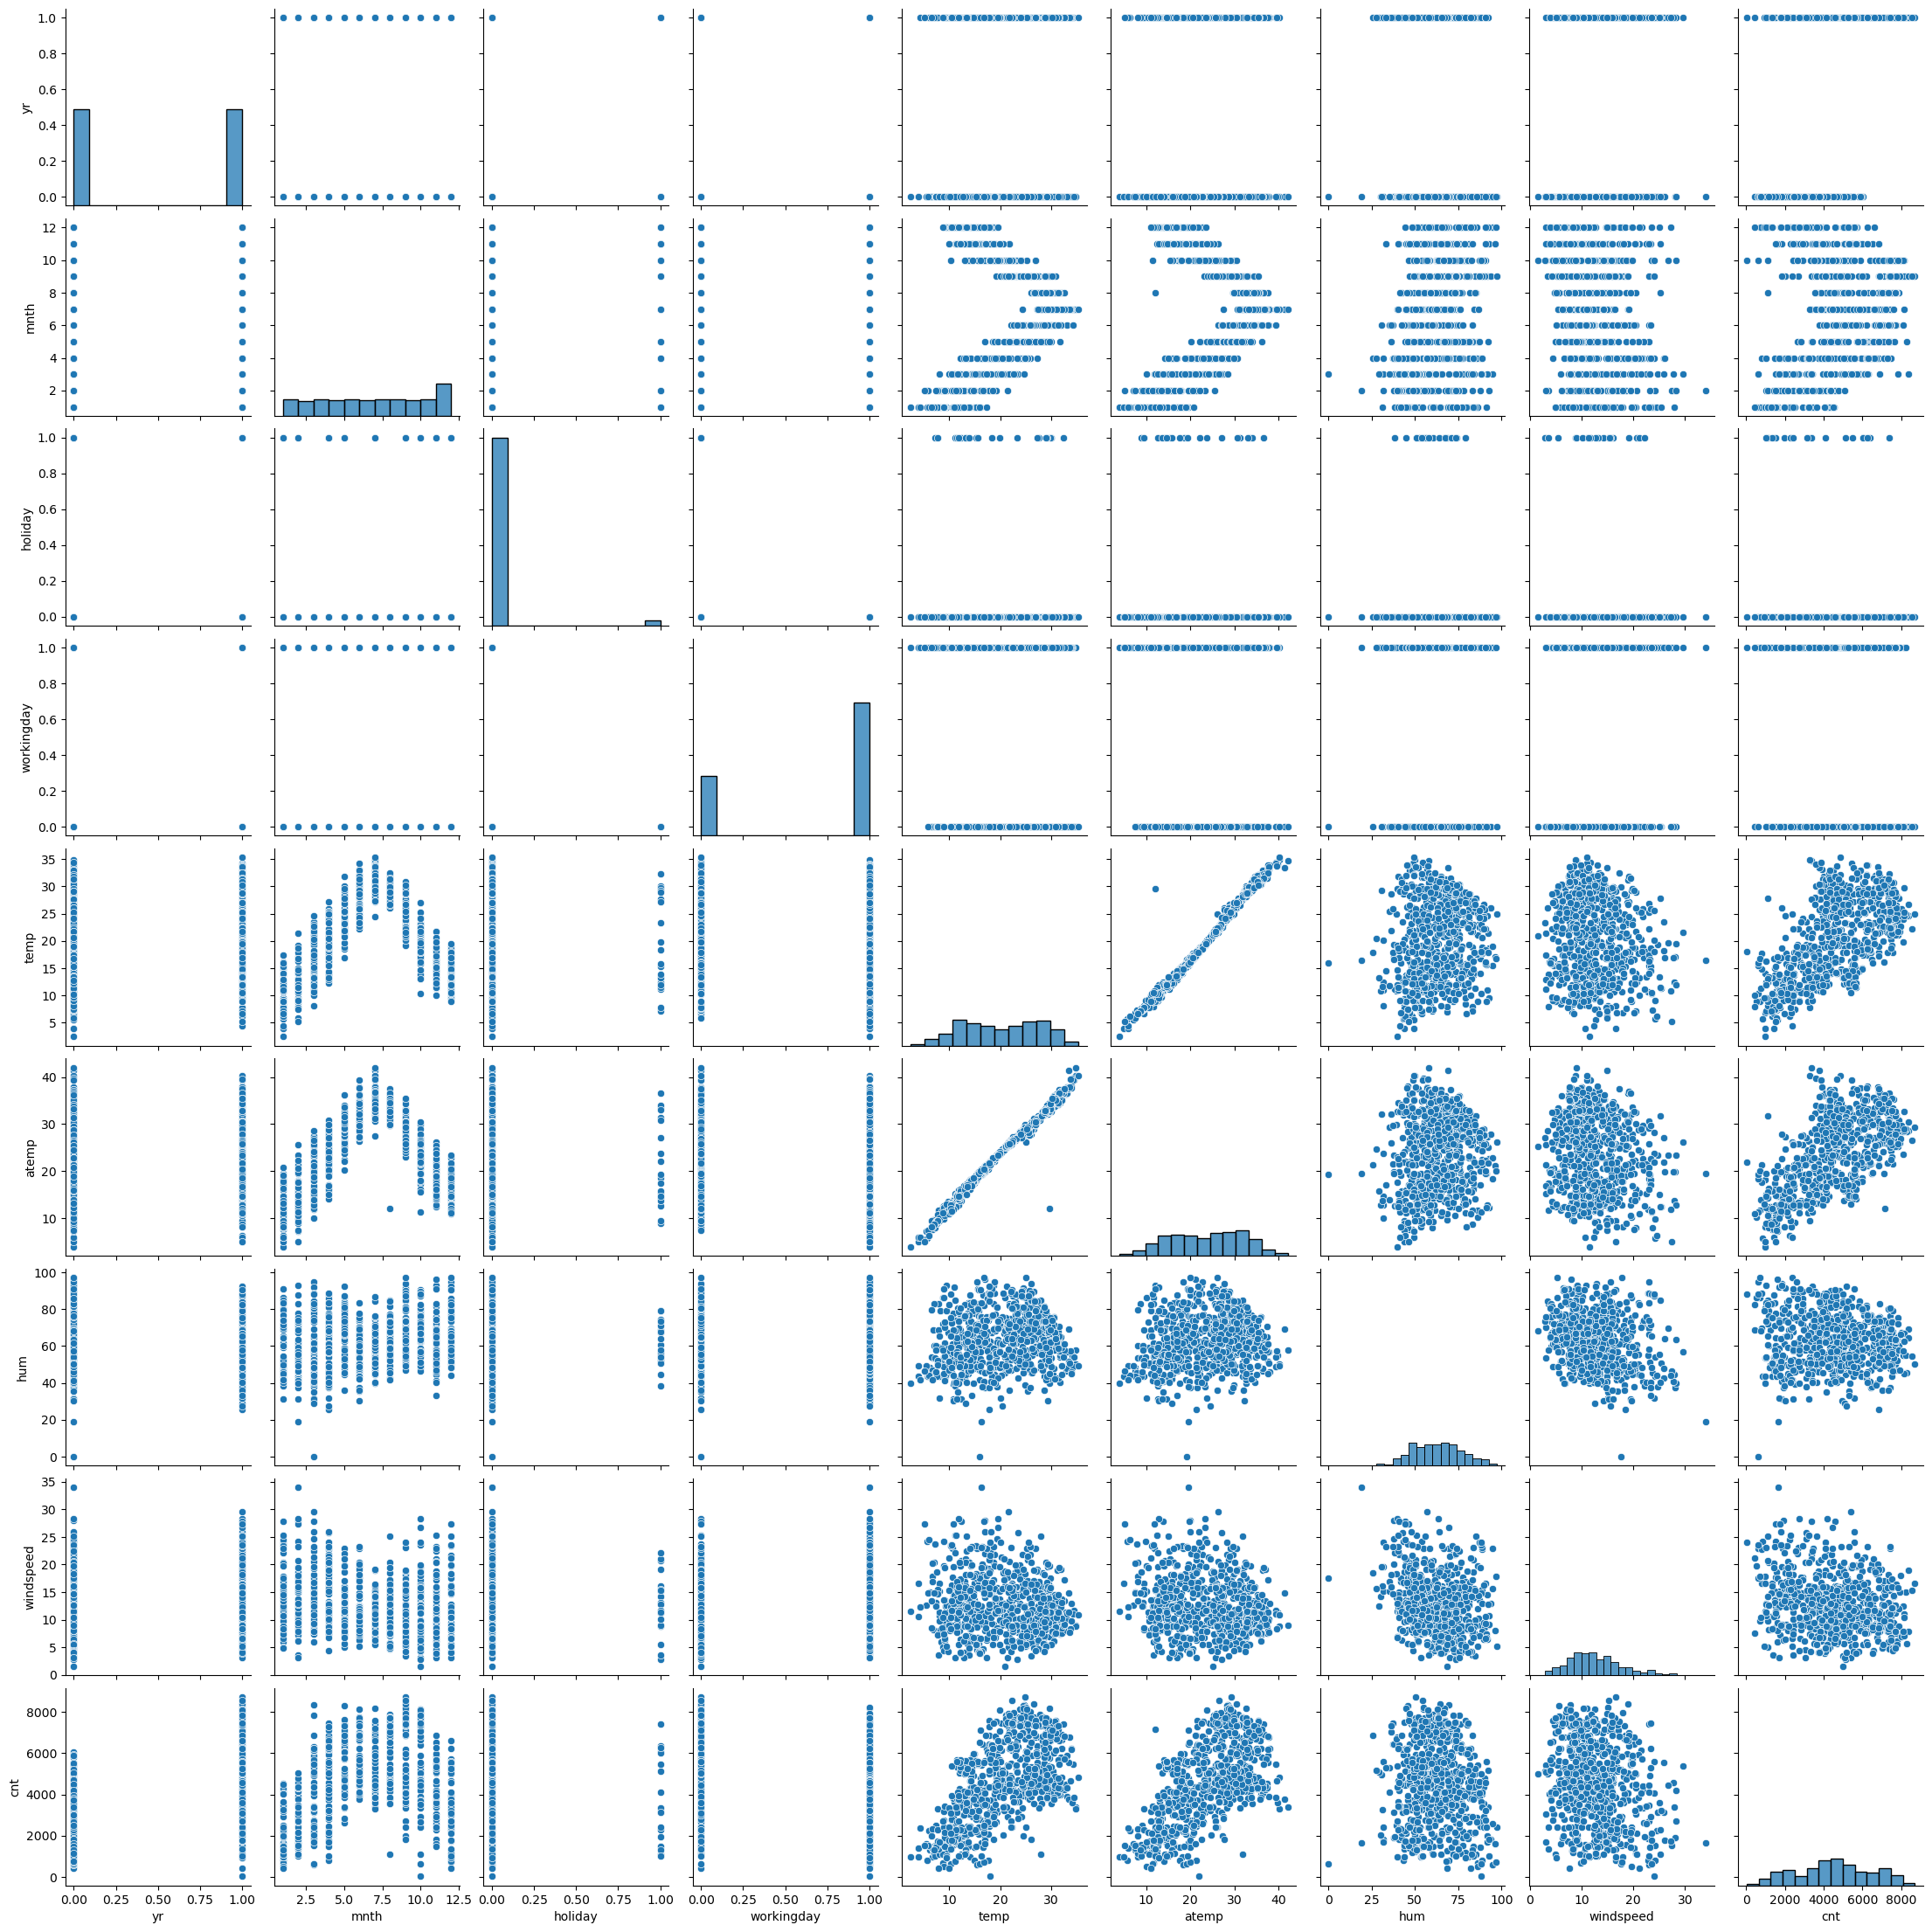

In [158]:
#Visualizing Numeric Variables
plt.figure(figsize=(20, 12))
day_df1=day_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']]
sns.pairplot(day_df)
plt.show()

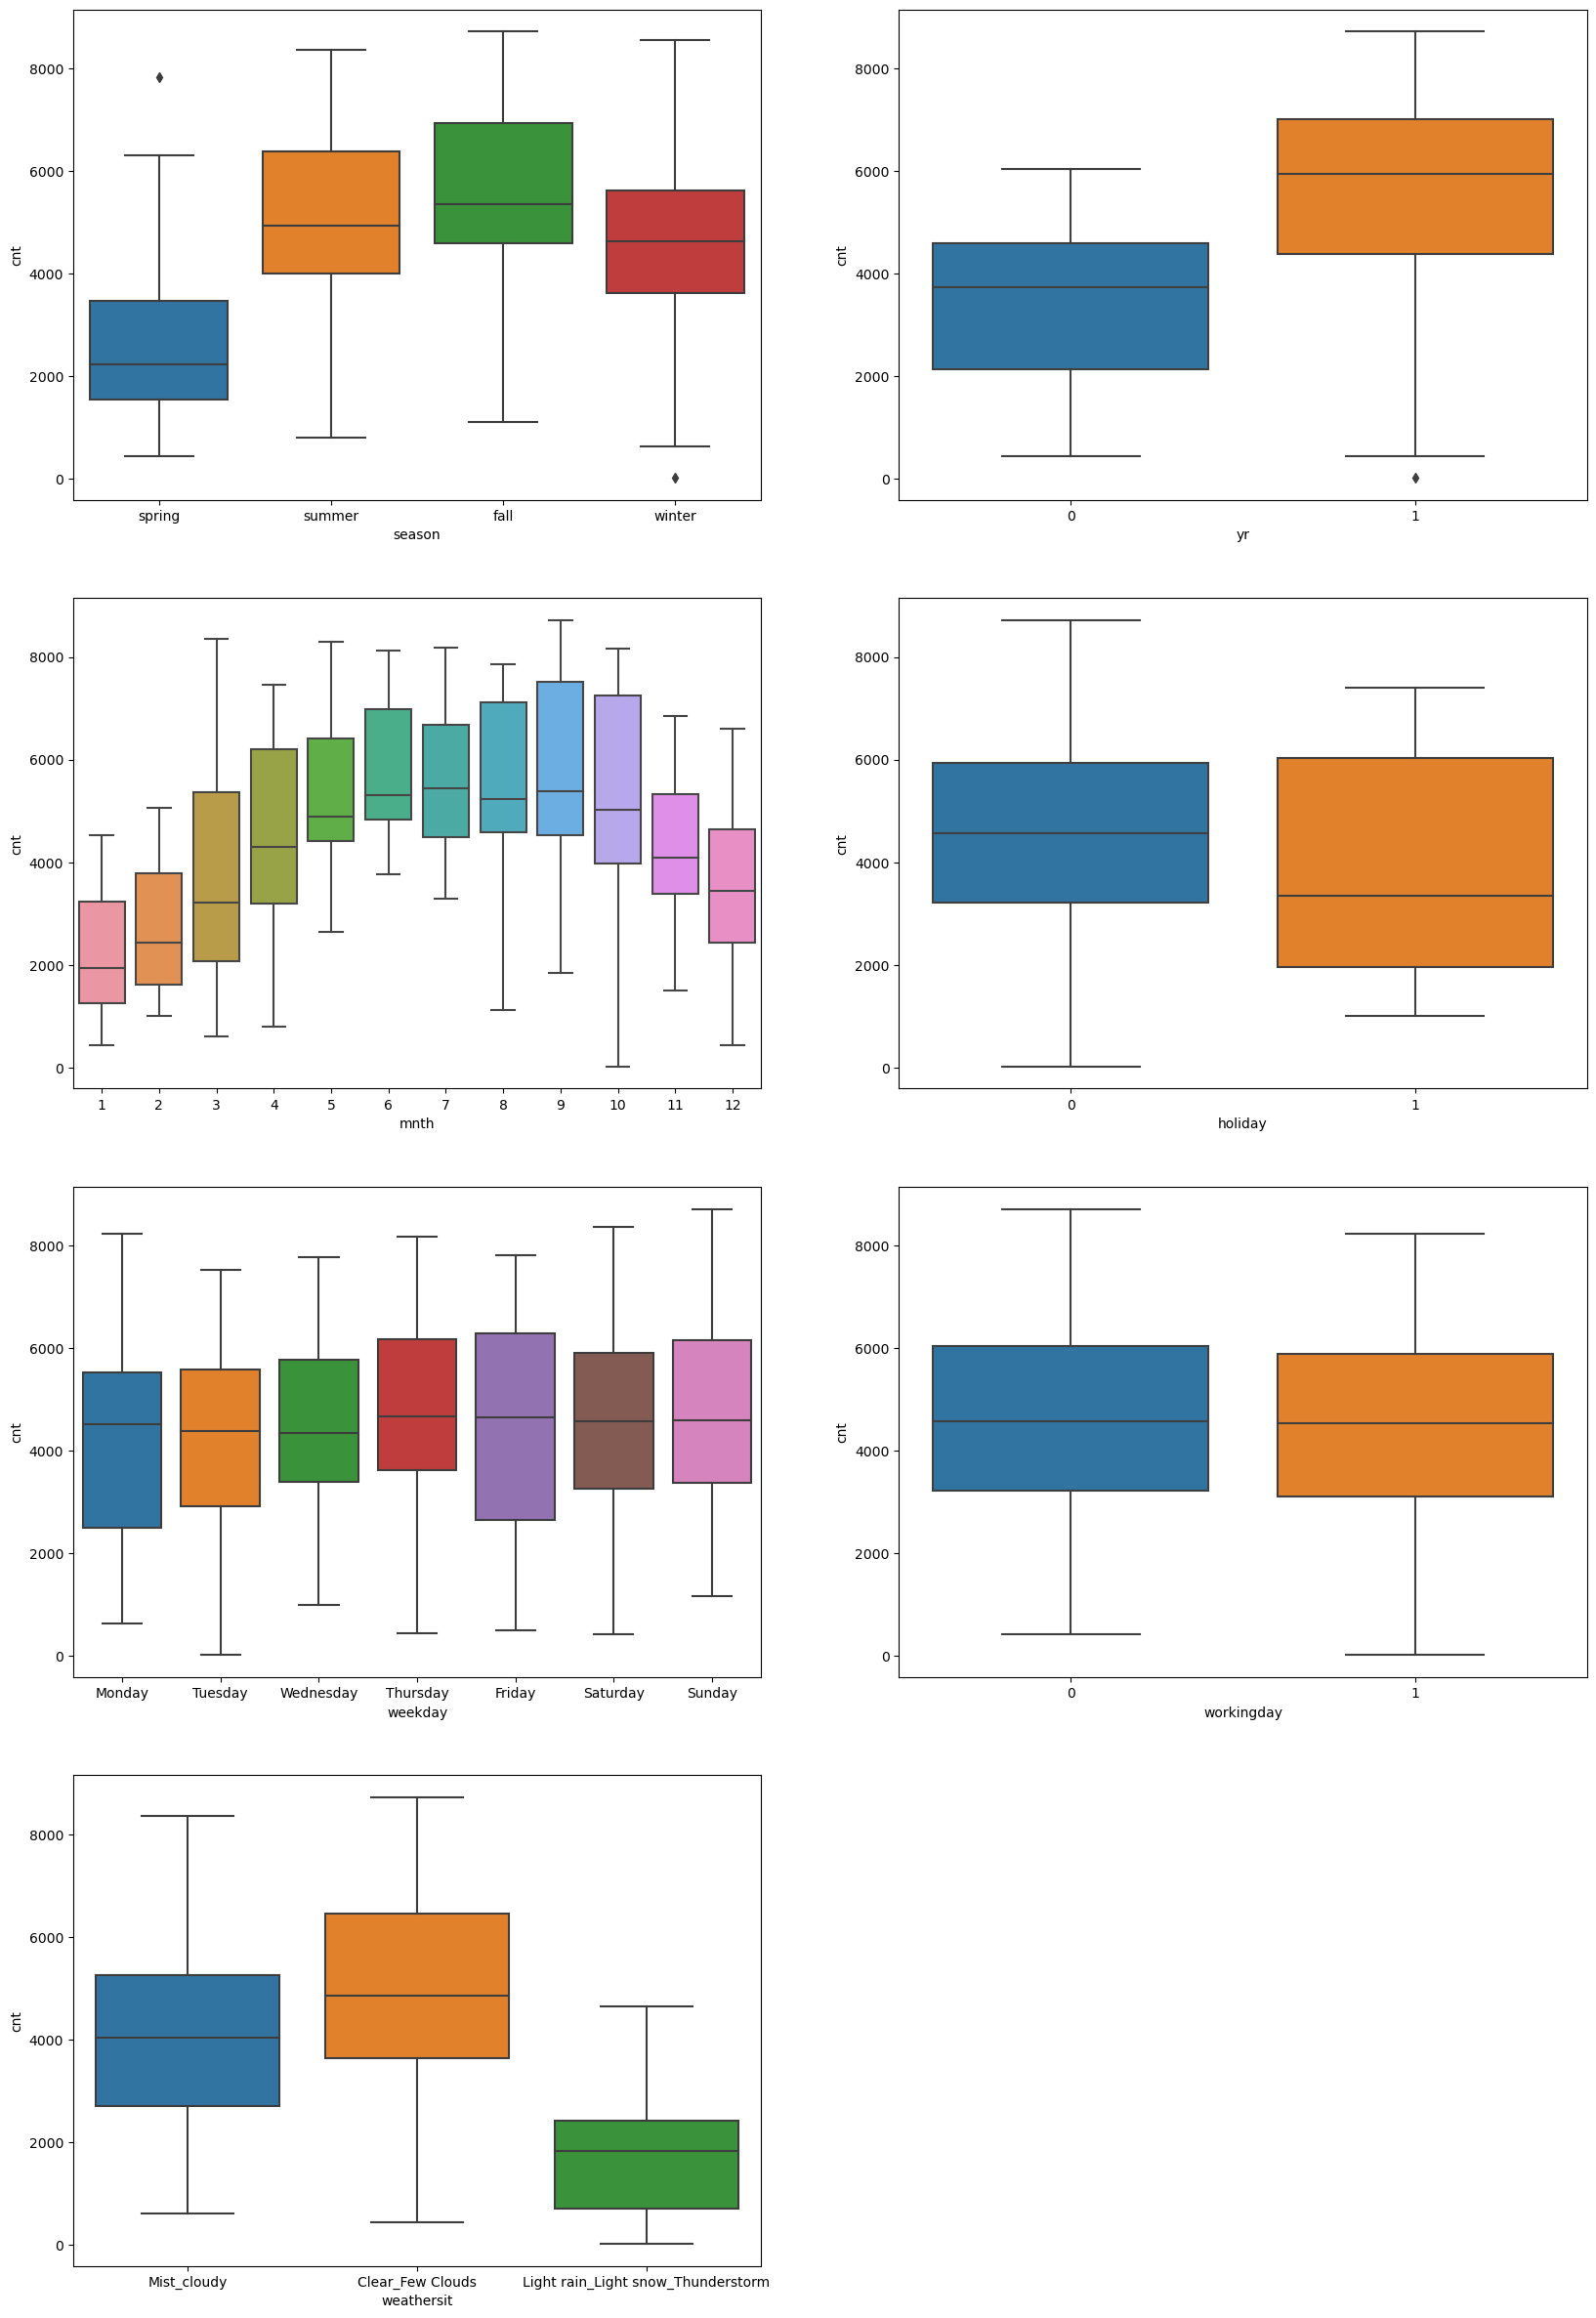

In [159]:
#Visualizing Categorical Variables

plt.figure(figsize=(20, 30))
plt.subplot(4,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = day_df)
plt.subplot(4,2,2)
sns.boxplot(x = 'yr', y = 'cnt', data = day_df)
plt.subplot(4,2,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = day_df)
plt.subplot(4,2,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = day_df)
plt.subplot(4,2,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = day_df)
plt.subplot(4,2,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = day_df)
plt.subplot(4,2,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = day_df)                                  
plt.show()

# Step 3: Data Preparation

In [160]:
#Convert variables to object type

day_df['season']=day_df['season'].astype(object)
day_df['mnth']=day_df['mnth'].astype(object)
day_df['weekday']=day_df['weekday'].astype(object)
day_df['weathersit']=day_df['weathersit'].astype(object)

In [161]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Dummy Variables

In [162]:
# Get the dummy variables for the features 'season','mnth','weekday','weathersit' and store it in a new variable - 'status'

status = pd.get_dummies(day_df[['season','mnth','weekday','weathersit']],drop_first=True)

In [163]:
status.head()

,season_spring,season_summer,season_winter,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,...,mnth_11,mnth_12,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy
0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [164]:
status.columns

Index(['season_spring', 'season_summer', 'season_winter', 'mnth_2', 'mnth_3',
       'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10',
       'mnth_11', 'mnth_12', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'weathersit_Light rain_Light snow_Thunderstorm',
       'weathersit_Mist_cloudy'],
      dtype='object')

In [165]:
# Add the results to the original dataframe

day_df = pd.concat([day_df, status], axis = 1)

In [166]:
day_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_11,mnth_12,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy
0,spring,0,1,0,Monday,1,Mist_cloudy,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,1,0,Tuesday,1,Mist_cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,1,0,Wednesday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,1,0,Thursday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,1,0,Friday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [167]:
# Drop variables 'season','mnth','weekday','weathersit'.

LIST=['season','mnth','weekday','weathersit']
day_df.drop(LIST,axis=1,inplace=True)
day_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_11,mnth_12,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [168]:
day_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_2',
       'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
       'mnth_10', 'mnth_11', 'mnth_12', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'weathersit_Light rain_Light snow_Thunderstorm',
       'weathersit_Mist_cloudy'],
      dtype='object')

# Step 4: Splitting the Data into Training and Testing Sets

In [169]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(day_df, train_size = 0.7, test_size = 0.3, random_state = 100)

## Rescaling the Features

In [170]:
from sklearn.preprocessing import MinMaxScaler

In [171]:
scaler = MinMaxScaler()

In [172]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = [ 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [173]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_11,mnth_12,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy
653,1,0,1,19.201653,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,29.246653,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,10.489153,0.200348,0.498067,0.663106,0.204096,1,0,...,0,1,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1


In [174]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_11,mnth_12,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,20.102429,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.084314,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.500429,0.157763,0.453386,7.431169,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.278131,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,2.424346,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.606865,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.209597,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


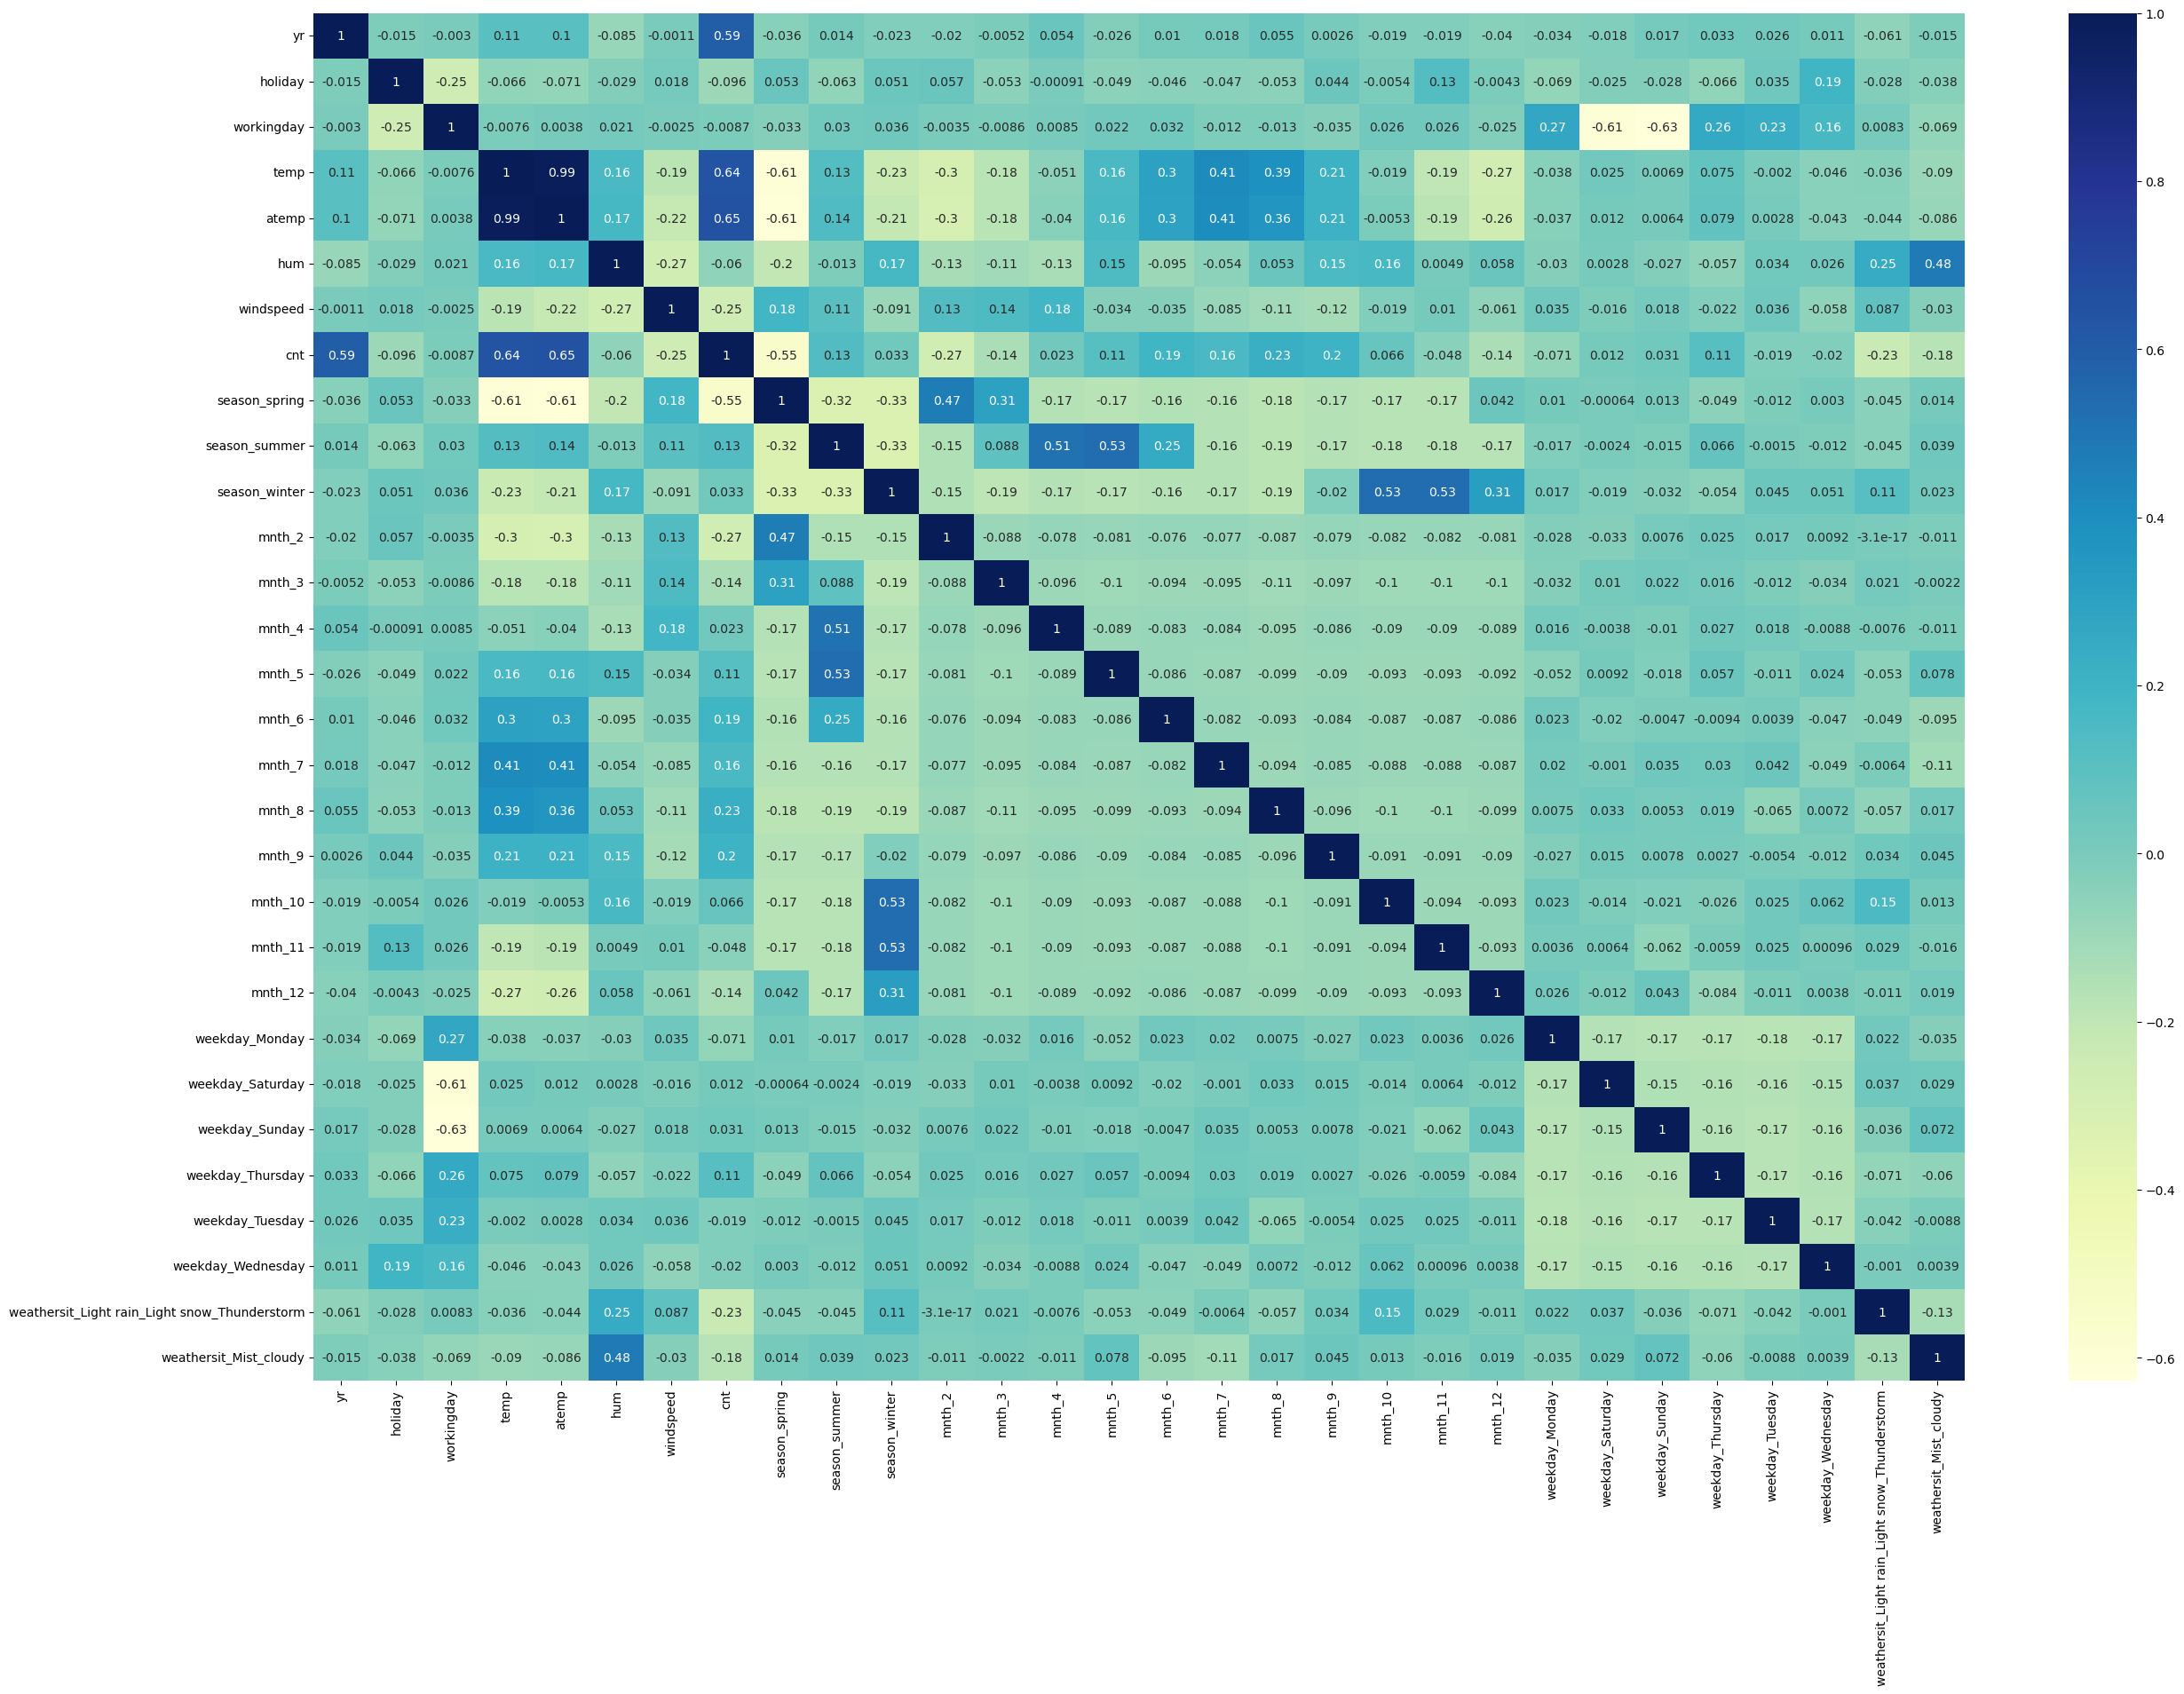

In [175]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

###### 
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- The correlation between the two variables is 0.99.

## Dividing into X and Y sets for the model building

In [176]:
y_train = df_train.pop('cnt')
X_train = df_train

# Step 5: Building a model

In [177]:
# Check all the columns of the dataframe

day_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_2',
       'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
       'mnth_10', 'mnth_11', 'mnth_12', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'weathersit_Light rain_Light snow_Thunderstorm',
       'weathersit_Mist_cloudy'],
      dtype='object')

In [178]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [179]:
# Running RFE with the output number of the variable equal to 20

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm)  # Create RFE object
rfe.fit(X_train, y_train)

# Set the number of features to select

num_features_to_select = 20
rfe.n_features_to_select = num_features_to_select

# Fit RFE with the specified number of features

X_train_rfe = rfe.transform(X_train)

In [180]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', False, 15),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 7),
 ('season_winter', True, 1),
 ('mnth_2', False, 9),
 ('mnth_3', True, 1),
 ('mnth_4', True, 1),
 ('mnth_5', True, 1),
 ('mnth_6', True, 1),
 ('mnth_7', False, 8),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', False, 3),
 ('mnth_11', False, 12),
 ('mnth_12', False, 13),
 ('weekday_Monday', False, 11),
 ('weekday_Saturday', False, 5),
 ('weekday_Sunday', False, 6),
 ('weekday_Thursday', False, 16),
 ('weekday_Tuesday', False, 10),
 ('weekday_Wednesday', False, 14),
 ('weathersit_Light rain_Light snow_Thunderstorm', True, 1),
 ('weathersit_Mist_cloudy', False, 2)]

In [181]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_8',
       'mnth_9', 'weathersit_Light rain_Light snow_Thunderstorm'],
      dtype='object')

In [182]:
X_train.columns[~rfe.support_]

Index(['workingday', 'temp', 'season_summer', 'mnth_2', 'mnth_7', 'mnth_10',
       'mnth_11', 'mnth_12', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'weathersit_Mist_cloudy'],
      dtype='object')

## Building model using statsmodel.

In [183]:
# Creating X_test dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [184]:
X_train_rfe.columns

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_8',
       'mnth_9', 'weathersit_Light rain_Light snow_Thunderstorm'],
      dtype='object')

In [185]:
# Adding a constant variable 

import statsmodels.api as sm  
X_train_rfe_lm = sm.add_constant(X_train_rfe)

In [186]:
# Running the linear model

lm = sm.OLS(y_train,X_train_rfe_lm).fit()   

In [187]:
#summary of linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     174.2
Date:                Sun, 03 Dec 2023   Prob (F-statistic):          6.05e-181
Time:                        10:18:30   Log-Likelihood:                 492.29
No. Observations:                 510   AIC:                            -954.6
Df Residuals:                     495   BIC:                            -891.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [188]:
# Calculate the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,17.67
2,atemp,13.15
4,windspeed,4.55
5,season_spring,3.33
6,season_winter,3.06
0,yr,2.08
11,mnth_8,1.90
9,mnth_5,1.77
8,mnth_4,1.67
10,mnth_6,1.65


## Updating the model

### Dropping 'hum' variable

In [189]:
X_train_new = X_train_rfe.drop(['hum'], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm_1 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     158.9
Date:                Sun, 03 Dec 2023   Prob (F-statistic):          2.43e-167
Time:                        10:18:30   Log-Likelihood:                 457.20
No. Observations:                 510   AIC:                            -886.4
Df Residuals:                     496   BIC:                            -827.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [190]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.23
3,windspeed,4.55
0,yr,2.08
4,season_spring,2.03
5,season_winter,1.89
10,mnth_8,1.84
9,mnth_6,1.64
8,mnth_5,1.56
7,mnth_4,1.52
11,mnth_9,1.43


### Dropping 'windspeed' variable

In [191]:
X_train_new = X_train_new.drop(['windspeed'], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm_2 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     163.8
Date:                Sun, 03 Dec 2023   Prob (F-statistic):          5.08e-164
Time:                        10:18:31   Log-Likelihood:                 446.64
No. Observations:                 510   AIC:                            -867.3
Df Residuals:                     497   BIC:                            -812.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [192]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,5.37
0,yr,2.07
9,mnth_8,1.84
4,season_winter,1.68
8,mnth_6,1.62
7,mnth_5,1.51
3,season_spring,1.47
10,mnth_9,1.43
5,mnth_3,1.31
6,mnth_4,1.31


### Dropping 'mnth_4' variable

In [193]:
X_train_new = X_train_new.drop(['mnth_4'], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm_3 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     177.4
Date:                Sun, 03 Dec 2023   Prob (F-statistic):          2.47e-164
Time:                        10:18:31   Log-Likelihood:                 444.69
No. Observations:                 510   AIC:                            -865.4
Df Residuals:                     498   BIC:                            -814.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [194]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.55
0,yr,2.04
8,mnth_8,1.65
4,season_winter,1.53
7,mnth_6,1.49
3,season_spring,1.41
6,mnth_5,1.40
9,mnth_9,1.34
5,mnth_3,1.29
10,weathersit_Light rain_Light snow_Thunderstorm,1.05


In [195]:
X_train_new.columns

Index(['yr', 'holiday', 'atemp', 'season_spring', 'season_winter', 'mnth_3',
       'mnth_5', 'mnth_6', 'mnth_8', 'mnth_9',
       'weathersit_Light rain_Light snow_Thunderstorm'],
      dtype='object')

### Adding 'weathersit_Mist_cloudy' variable

In [196]:
X_train_new['weathersit_Mist_cloudy']=X_train['weathersit_Mist_cloudy']
X_train_new.head()

,yr,holiday,atemp,season_spring,season_winter,mnth_3,mnth_5,mnth_6,mnth_8,mnth_9,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy
653,1,0,0.501133,0,1,0,0,0,0,0,0,0
576,1,0,0.766351,0,0,0,0,0,0,0,0,0
426,1,0,0.438975,1,0,1,0,0,0,0,0,1
728,1,0,0.200348,1,0,0,0,0,0,0,0,0
482,1,0,0.391735,0,0,0,0,0,0,0,0,1


In [197]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm_4 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     194.4
Date:                Sun, 03 Dec 2023   Prob (F-statistic):          6.00e-179
Time:                        10:18:31   Log-Likelihood:                 482.08
No. Observations:                 510   AIC:                            -938.2
Df Residuals:                     497   BIC:                            -883.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [198]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.66
0,yr,2.04
8,mnth_8,1.66
4,season_winter,1.59
11,weathersit_Mist_cloudy,1.53
7,mnth_6,1.49
3,season_spring,1.48
6,mnth_5,1.43
9,mnth_9,1.35
5,mnth_3,1.29


### Adding 'working day' variable

In [199]:
X_train_new['workingday']=X_train['workingday']
X_train_new.head()

,yr,holiday,atemp,season_spring,season_winter,mnth_3,mnth_5,mnth_6,mnth_8,mnth_9,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy,workingday
653,1,0,0.501133,0,1,0,0,0,0,0,0,0,1
576,1,0,0.766351,0,0,0,0,0,0,0,0,0,1
426,1,0,0.438975,1,0,1,0,0,0,0,0,1,0
728,1,0,0.200348,1,0,0,0,0,0,0,0,0,1
482,1,0,0.391735,0,0,0,0,0,0,0,0,1,0


In [200]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm_5 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     181.7
Date:                Sun, 03 Dec 2023   Prob (F-statistic):          4.50e-179
Time:                        10:18:31   Log-Likelihood:                 485.12
No. Observations:                 510   AIC:                            -942.2
Df Residuals:                     496   BIC:                            -883.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [201]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,5.92
12,workingday,3.36
0,yr,2.04
4,season_winter,1.74
3,season_spring,1.69
8,mnth_8,1.66
11,weathersit_Mist_cloudy,1.53
7,mnth_6,1.49
6,mnth_5,1.44
9,mnth_9,1.35


### Adding 'season_summer' variable

In [202]:
X_train_new['season_summer']=X_train['season_summer']
X_train_new.head()

,yr,holiday,atemp,season_spring,season_winter,mnth_3,mnth_5,mnth_6,mnth_8,mnth_9,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy,workingday,season_summer
653,1,0,0.501133,0,1,0,0,0,0,0,0,0,1,0
576,1,0,0.766351,0,0,0,0,0,0,0,0,0,1,0
426,1,0,0.438975,1,0,1,0,0,0,0,0,1,0,0
728,1,0,0.200348,1,0,0,0,0,0,0,0,0,1,0
482,1,0,0.391735,0,0,0,0,0,0,0,0,1,0,1


In [203]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm_6 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sun, 03 Dec 2023   Prob (F-statistic):          9.81e-179
Time:                        10:18:31   Log-Likelihood:                 487.03
No. Observations:                 510   AIC:                            -944.1
Df Residuals:                     495   BIC:                            -880.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [204]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.15
12,workingday,3.56
13,season_summer,2.90
0,yr,2.08
3,season_spring,2.02
4,season_winter,2.00
6,mnth_5,1.84
8,mnth_8,1.83
11,weathersit_Mist_cloudy,1.59
7,mnth_6,1.55


### Dropping 'mnth_6' variable

In [205]:
X_train_new = X_train_new.drop(['mnth_6'], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm_7 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     181.8
Date:                Sun, 03 Dec 2023   Prob (F-statistic):          4.12e-179
Time:                        10:18:31   Log-Likelihood:                 485.21
No. Observations:                 510   AIC:                            -942.4
Df Residuals:                     496   BIC:                            -883.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [206]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,5.17
11,workingday,3.56
12,season_summer,2.79
0,yr,2.07
3,season_spring,2.02
4,season_winter,1.92
7,mnth_8,1.69
6,mnth_5,1.61
10,weathersit_Mist_cloudy,1.58
8,mnth_9,1.38


### Adding 'mnth_5' variable

In [207]:
X_train_new = X_train_new.drop(['mnth_5'], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm_8 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     196.1
Date:                Sun, 03 Dec 2023   Prob (F-statistic):          1.08e-179
Time:                        10:18:31   Log-Likelihood:                 483.84
No. Observations:                 510   AIC:                            -941.7
Df Residuals:                     497   BIC:                            -886.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [208]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,5.12
10,workingday,3.55
11,season_summer,2.26
0,yr,2.06
3,season_spring,2.01
4,season_winter,1.92
6,mnth_8,1.69
9,weathersit_Mist_cloudy,1.58
7,mnth_9,1.37
5,mnth_3,1.29


### Dropping 'mnth_3' variable

In [209]:
X_train_new = X_train_new.drop(['mnth_3'], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm_9 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     212.9
Date:                Sun, 03 Dec 2023   Prob (F-statistic):          2.89e-180
Time:                        10:18:31   Log-Likelihood:                 482.42
No. Observations:                 510   AIC:                            -940.8
Df Residuals:                     498   BIC:                            -890.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [210]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,5.11
9,workingday,3.55
10,season_summer,2.20
0,yr,2.06
4,season_winter,1.92
3,season_spring,1.78
5,mnth_8,1.69
8,weathersit_Mist_cloudy,1.58
6,mnth_9,1.37
1,holiday,1.11


### Adding 'season_summer' variable

In [211]:
X_train_new = X_train_new.drop(['season_summer'], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm_10 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     226.6
Date:                Sun, 03 Dec 2023   Prob (F-statistic):          2.24e-178
Time:                        10:18:31   Log-Likelihood:                 475.13
No. Observations:                 510   AIC:                            -928.3
Df Residuals:                     499   BIC:                            -881.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [212]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.30
9,workingday,3.34
0,yr,2.04
8,weathersit_Mist_cloudy,1.49
4,season_winter,1.48
3,season_spring,1.46
5,mnth_8,1.34
6,mnth_9,1.19
1,holiday,1.10
7,weathersit_Light rain_Light snow_Thunderstorm,1.06


### Dropping 'mnth_8' variable

In [213]:
X_train_new = X_train_new.drop(['mnth_8'], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm_11 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     251.8
Date:                Sun, 03 Dec 2023   Prob (F-statistic):          2.13e-179
Time:                        10:18:31   Log-Likelihood:                 474.68
No. Observations:                 510   AIC:                            -929.4
Df Residuals:                     500   BIC:                            -887.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [214]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,3.78
8,workingday,3.33
0,yr,2.04
7,weathersit_Mist_cloudy,1.49
3,season_spring,1.43
4,season_winter,1.42
5,mnth_9,1.15
1,holiday,1.10
6,weathersit_Light rain_Light snow_Thunderstorm,1.06


In [215]:
X_train_new.columns

Index(['yr', 'holiday', 'atemp', 'season_spring', 'season_winter', 'mnth_9',
       'weathersit_Light rain_Light snow_Thunderstorm',
       'weathersit_Mist_cloudy', 'workingday'],
      dtype='object')

In [216]:
X_train_lm.columns

Index(['const', 'yr', 'holiday', 'atemp', 'season_spring', 'season_winter',
       'mnth_9', 'weathersit_Light rain_Light snow_Thunderstorm',
       'weathersit_Mist_cloudy', 'workingday'],
      dtype='object')

# Step 6: Residual Analysis of the train data

In [217]:
y_train_cnt = lm_11.predict(X_train_lm)

Text(0.5, 0, 'Errors')

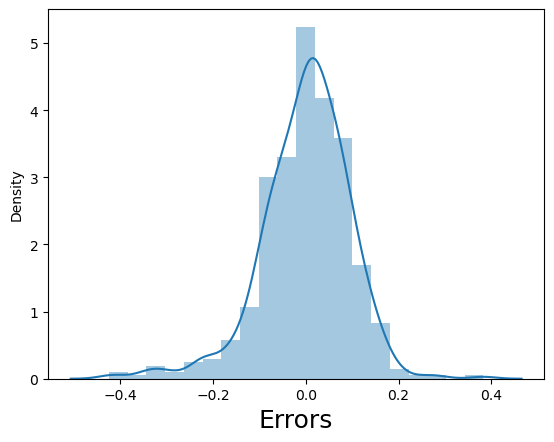

In [218]:
# Plot the histogram of the error terms

sns.distplot((y_train - y_train_cnt), bins = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

# Step 7: Making Predictions Using the Final Model

## Applying the scaling on the test sets

In [219]:
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [220]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_11,mnth_12,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,20.815737,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.073059,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.319635
std,0.500722,0.188034,0.481313,7.689600,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.260830,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.467403
min,0.000000,0.000000,0.000000,3.957390,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.093750,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,20.807500,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,27.401653,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,34.815847,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Dividing into X_test and y_test

In [221]:
y_test = df_test.pop('cnt')
X_test = df_test

In [222]:
# Adding constant variable to test dataframe
X_test_m11 = sm.add_constant(X_test)

In [223]:
X_test_m11.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'season_spring', 'season_summer', 'season_winter',
       'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday',
       'weathersit_Light rain_Light snow_Thunderstorm',
       'weathersit_Mist_cloudy'],
      dtype='object')

In [224]:
LIST=['const', 'yr', 'holiday', 'atemp', 'season_spring', 'season_winter',
       'mnth_9', 'weathersit_Light rain_Light snow_Thunderstorm',
       'weathersit_Mist_cloudy', 'workingday']
X_test_m11 = X_test_m11[LIST]

In [225]:
# Making predictions using the fourth model

y_pred_m11 = lm_11.predict(X_test_m11)

# Step 8: Model Evaluation

Text(0, 0.5, 'y_pred')

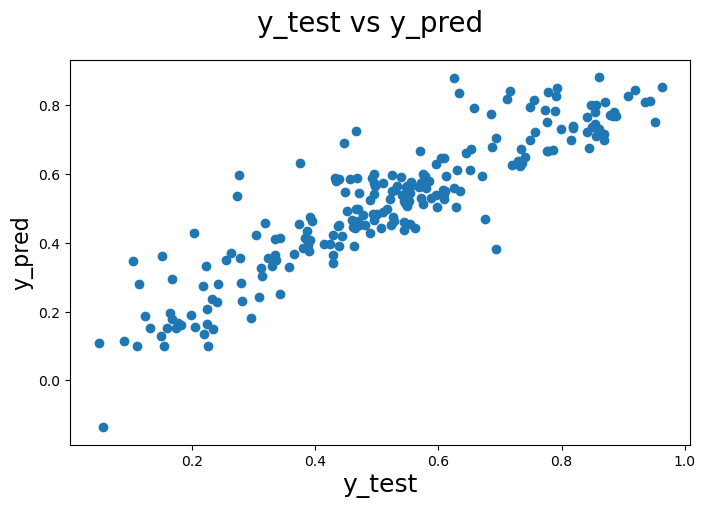

In [226]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_m11)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

## R_2 score

In [227]:
from sklearn.metrics import r2_score

In [228]:
r_squared = r2_score(y_test, y_pred_m11)
r_squared

0.8128451579096341

## Adjusted R_2 score

In [229]:
X_test_m11.shape

(219, 10)

In [230]:
# n is number of rows in X

n = X_test_m11.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test_m11.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r_squared = 1-(1-r_squared)*(n-1)/(n-p-1)
adjusted_r_squared

0.8038473289629819

In [231]:
#coefficient values
lm_11.params

const                                            0.230805
yr                                               0.234952
holiday                                         -0.113178
atemp                                            0.447276
season_spring                                   -0.120034
season_winter                                    0.049782
mnth_9                                           0.076907
weathersit_Light rain_Light snow_Thunderstorm   -0.296791
weathersit_Mist_cloudy                          -0.079661
workingday                                      -0.023037
dtype: float64

## F Statistics
F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.
F-statistic:                     251.8
Prob (F-statistic):          2.13e-179

The F-Statistics value of 251.8 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant

## The equation
cnt= 0.230805 + yr* 0.234952 - holiday*0.113178 + atemp*0.447276 - season_spring*0.120034 + season_winter*0.049782 +
     mnth_9*0.076907 - weathersit_Light rain_Light snow_Thunderstorm*0.296791 - weathersit_Mist_cloudy*0.079661 -
     workingday*0.023037

## Final Result Comparison
- Train R_2 score :0.819
- Train Adjusted R_2 score :0.816
- Test R_2 score :0.813
- Test Adjusted R_2 score :0.804